In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
data=pd.read_csv('textResponses.csv')

In [3]:
data['pattern']=''
for i in range(len(data)):
    try:
        data['Duration (sec)'][i]=float(data['Duration (sec)'][i])
    except:
        data['Duration (sec)'][i]=0.0
    if data['Level (Assignment)'][i][-1]=='n':
        data['pattern'][i]='collaborative'
    elif data['Level (Assignment)'][i][-1]=='l':
        data['pattern'][i]='individual'
    else:
        data['pattern'][i]='test'

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\envs\torch\lib\site-packages\ipy

In [4]:
group_data=data.groupby(['Anon Student Id','Level (Assignment)'])[['Duration (sec)','pattern','Input','Problem Name']]

In [5]:
group_data.head()

,Duration (sec),pattern,Input,Problem Name
0,132.5,test,"no, because you don't change the denominater s...",5
1,581,test,I do not know this answer.,6
2,15.75,collaborative,Frist you need to double the denometor then do...,1a
3,0.333,collaborative,"First, multiply the denominater by two then do...",2a
4,11,collaborative,first muply 8 by 2 then do the same to the num...,3a
...,...,...,...,...
7321,11.5,collaborative,find the least common denominator not just a c...,3a
7322,4.5,collaborative,Do not add the numerator,4a
7323,0.333,collaborative,The larger denominator is not always the large...,5a
7327,47.5,test,It cant be 6/13 becuase of the picture shown. ...,5


In [6]:
group_data.size()

Anon Student Id                       Level (Assignment)                
Stu_005a9729f8e3869ff12b105e0f7bb82e  Comparing Erroneous Collaboration     4
                                      Equivalent Erroneous Collaboration    5
                                      LCD Erroneous Collaboration           8
                                      Show what you know A                  2
                                      Show what you learned B               2
                                                                           ..
Stu_ff8ca883ce7d29e296f0ed8e55a3b31d  Show what you learned B               2
Stu_ffe4ba291fd0ec27d27a34dcceb3a617  Comparing Erroneous Collaboration     8
                                      LCD Erroneous Collaboration           9
                                      Show what you know B                  2
                                      Show what you learned A               2
Length: 1878, dtype: int64

In [7]:
data_rows=[temp_row for temp_row in group_data]

In [8]:
for a in data_rows[187][1].Input:
    print(a)

I think the answer is 1 and 1/20 because the lowest common denominator is 40, so 2/8= 10/40 and 4/5=
I think the answer is 1 and 1/20 because the lowest common denominator is 40, so 2/8= 10/40 and 4/5=32/40 and 10/40+32/40= 42/40 which then simplifies to 1 and 2/40 which then simplifies to 1 and 1/20.
32/65 is smaller because 32/65 is a smaller amount and has a higher denominator, and 32/45 are part of a bigger amount and have the lower denominator with the same numerator, therefore 32/65 is smaller.


In [9]:
analyze_list=[]

In [10]:
len(group_data)

1878

In [11]:
from nltk.metrics import edit_distance
ind_duration_mean=[]
ind_duration_sum=[]
ind_mod_num=[]
ind_mod_ed_mean=[]
ind_mod_ed_sum=[]

col_duration_mean=[]
col_duration_sum=[]
col_mod_num=[]
col_mod_ed_mean=[]
col_mod_ed_sum=[]

for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        col_duration_mean.append(temp_durance_mean)
        col_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        col_mod_num.append(temp_mod_num)
        col_mod_ed_mean.append(temp_mod_mean)
        col_mod_ed_sum.append(temp_mod_sum)
                        
            
            
                                
    elif temp_row[1].pattern.iloc[0]=='individual':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        ind_duration_mean.append(temp_durance_mean)
        ind_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        ind_mod_num.append(temp_mod_num)
        ind_mod_ed_mean.append(temp_mod_mean)
        ind_mod_ed_sum.append(temp_mod_sum)
    
    

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 26,
}

# Mean Duration

In [13]:
stats.ttest_ind(ind_duration_mean,col_duration_mean,equal_var = False)

Ttest_indResult(statistic=-3.675791363307244, pvalue=0.0002542002492319173)

In [14]:
stats.f_oneway(ind_duration_mean, col_duration_mean)

F_onewayResult(statistic=10.563885626666444, pvalue=0.0011873798646465977)

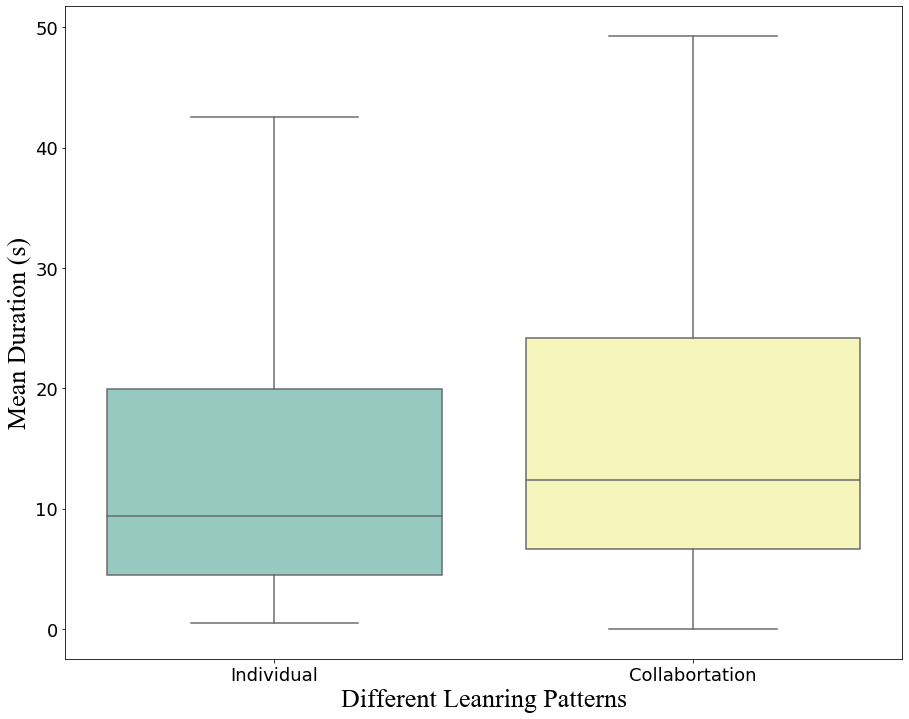

In [15]:
patterns=["Individual"]*len(ind_duration_mean)+ ['Collabortation']*len(col_duration_mean)
values=np.concatenate((ind_duration_mean,col_duration_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Mean Duration (s)":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Mean Duration (s)", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Mean Duration (s)',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Sum Duration

In [16]:
stats.ttest_ind(ind_duration_sum,col_duration_sum,equal_var = False)

Ttest_indResult(statistic=3.4488137910696346, pvalue=0.0006124374996547792)

In [17]:
stats.f_oneway(ind_duration_sum, col_duration_sum)

F_onewayResult(statistic=14.09277752130214, pvalue=0.0001829138303795924)

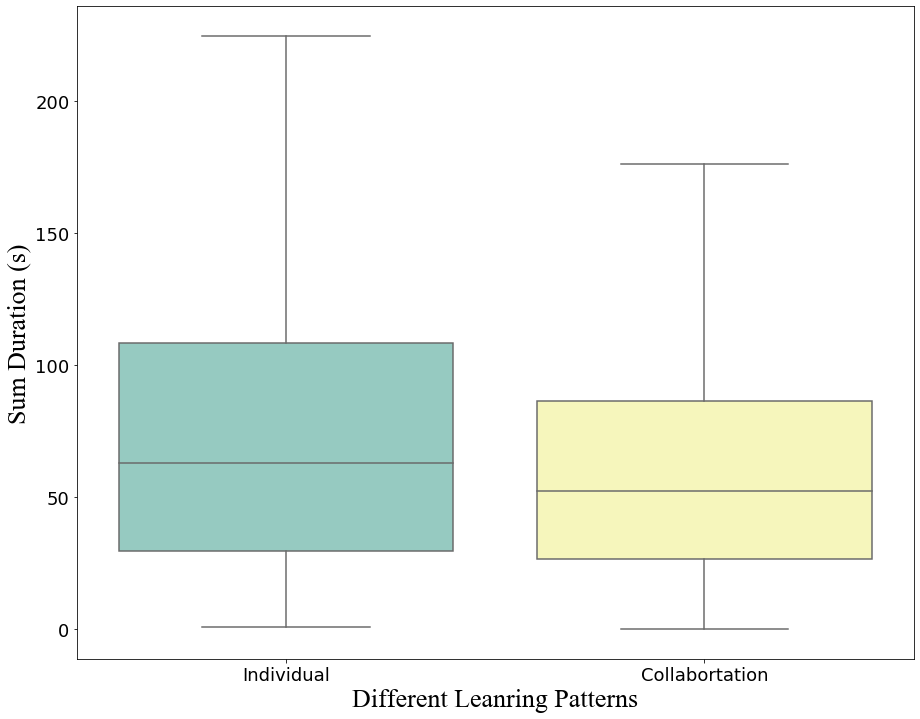

In [18]:
patterns=["Individual"]*len(ind_duration_sum)+ ['Collabortation']*len(col_duration_sum)
values=np.concatenate((ind_duration_sum,col_duration_sum))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Sum Duration (s)":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Sum Duration (s)", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Sum Duration (s)',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Number of Modifications

In [19]:
ind_mod_num=np.array(ind_mod_num)/2
col_mod_num=np.array(col_mod_num)/2

In [20]:
stats.ttest_ind(ind_mod_num,col_mod_num,equal_var = False)

Ttest_indResult(statistic=13.600176069851846, pvalue=8.187269361020857e-37)

In [21]:
stats.f_oneway(ind_mod_num, col_mod_num)

F_onewayResult(statistic=177.79566213429655, pvalue=9.203819877717436e-38)

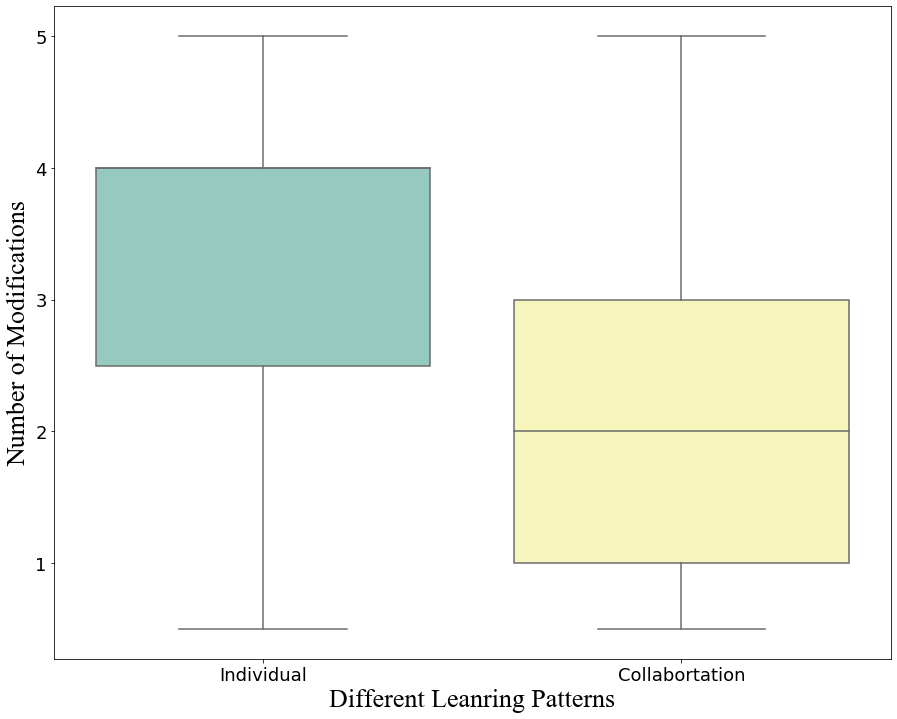

In [22]:
patterns=["Individual"]*len(ind_mod_num)+ ['Collabortation']*len(col_mod_num)
values=np.concatenate((ind_mod_num,col_mod_num))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Number of Modifications":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Number of Modifications", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Number of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Mean Edit Distance of Modifications

In [23]:
ind_mod_ed_mean=np.array(ind_mod_ed_mean)/20
col_mod_ed_mean=np.array(col_mod_ed_mean)/20

In [24]:
stats.ttest_ind(ind_mod_ed_mean,col_mod_ed_mean,equal_var = False)

Ttest_indResult(statistic=1.6947754866116198, pvalue=0.09080253634748327)

In [25]:
stats.f_oneway(ind_mod_ed_mean, col_mod_ed_mean)

F_onewayResult(statistic=3.6580665684035227, pvalue=0.05605227944398764)

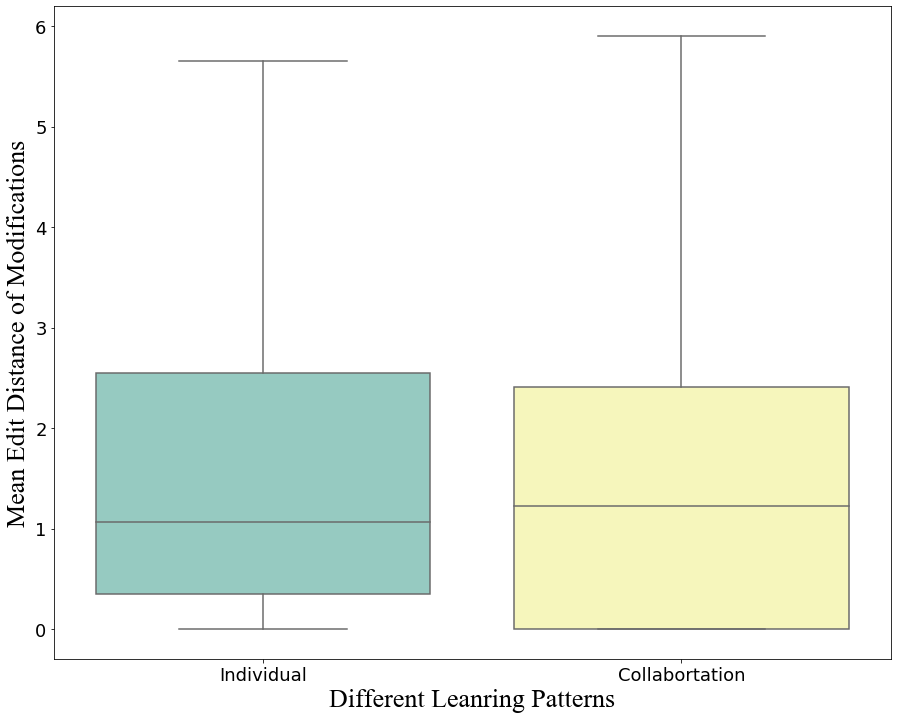

In [26]:
patterns=["Individual"]*len(ind_mod_ed_mean)+ ['Collabortation']*len(col_mod_ed_mean)
values=np.concatenate((ind_mod_ed_mean,col_mod_ed_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Mean Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Mean Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Mean Edit Distance of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Sum Edit Distance of Modifications

In [27]:
ind_mod_ed_sum=np.array(ind_mod_ed_sum)/50
col_mod_ed_sum=np.array(col_mod_ed_sum)/50

In [28]:
stats.ttest_ind(ind_mod_ed_sum,col_mod_ed_sum,equal_var = False)

Ttest_indResult(statistic=4.969825715069301, pvalue=9.71648198752056e-07)

In [29]:
stats.f_oneway(ind_mod_ed_sum, col_mod_ed_sum)

F_onewayResult(statistic=34.24983365429823, pvalue=6.3531510157383586e-09)

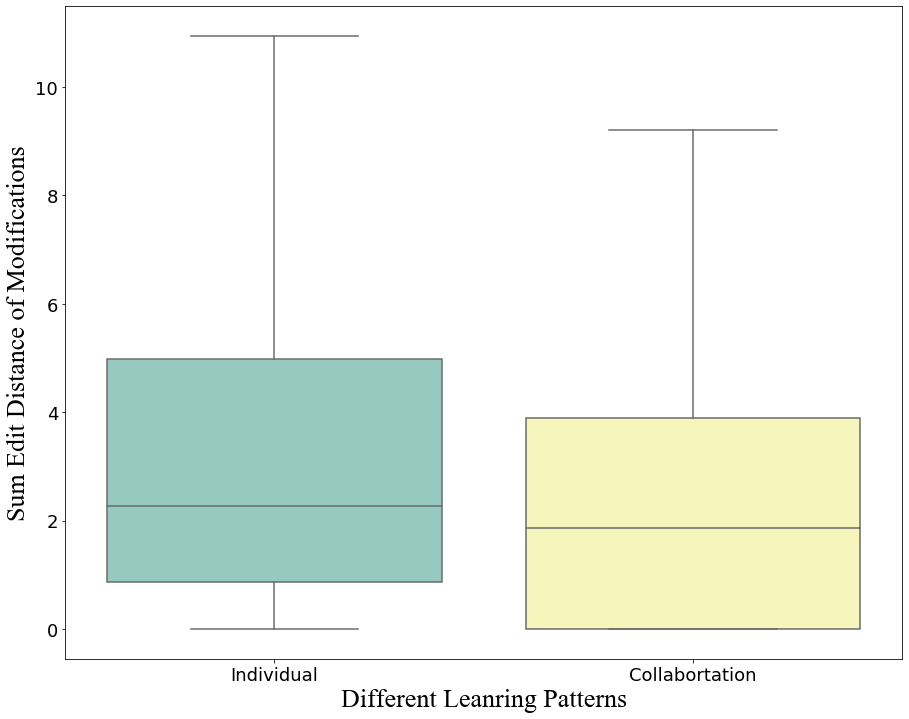

In [30]:
patterns=["Individual"]*len(ind_mod_ed_sum)+ ['Collabortation']*len(col_mod_ed_sum)
values=np.concatenate((ind_mod_ed_sum,col_mod_ed_sum))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Sum Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Sum Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Sum Edit Distance of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Interaction effect of learning pattern

In [38]:
teach_data=pd.read_csv('prepostReducedPartial.csv')
teach_data.head()

,Student_ID,Time,Type,Test,Class,Teacher,SchoolDistrict,AssignedCondition,ActualCondition,Dyad,...,ErrorsLCDErroneous,ErrorsLCDProcedural,ErrorsErroneous,ErrorsProcedural,ErrorsTotal,WrittenLength,StudentDuration,ClassDuration,TotalPercentStudentDuration,TotalPercentClassDuration
0,Stu_005a9729f8e3869ff12b105e0f7bb82e,Pretest,A,Pretest A,Deley,Deley,Montour,M,M,430.0,...,42,13,122,28,150,104.0,32,36,0.006944,NaN
1,Stu_005a9729f8e3869ff12b105e0f7bb82e,Posttest,B,Posttest B,Deley,Deley,Montour,M,M,430.0,...,42,13,122,28,150,26.0,26,61,0.029440,NaN
2,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Pretest,B,Pretest B,Shields,Shields,Lebanon,I,I,NaN,...,45,14,91,133,224,135.0,32,48,0.003472,NaN
3,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Posttest,A,Posttest A,Shields,Shields,Lebanon,I,I,NaN,...,45,14,91,133,224,78.0,27,43,0.019204,NaN
4,Stu_03c1e9a4dde8c645a7554f75a1f33ea7,Pretest,A,Pretest A,Marchiona 1,Marchiona,Hopewell,M,M,431.0,...,13,5,60,19,79,201.0,38,1152,0.003899,NaN


In [39]:
teach_data.Teacher.value_counts()

Marchiona      122
Rongaus         78
Huffman         40
Ewonce          38
Rinier          36
Giovannitti     36
Pucka           34
Rindels         34
Genes           34
Deley           32
Brallier        32
Pilyih          26
Shaffer         26
Herrington      24
Shields         22
Name: Teacher, dtype: int64

In [40]:
teach_data_reduced=teach_data[teach_data.Time=='Pretest'][['Student_ID','Teacher','Gender','Grade']]
teach_data_reduced=teach_data_reduced.rename(index=str, columns={'Grade':'age'})
data=data.rename(index=str, columns={"Anon Student Id": "Student_ID"})
new_data=pd.merge(data, teach_data_reduced, on='Student_ID')

In [41]:
new_data

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),pattern,Teacher,Gender,age
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,test,Deley,Male,4
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,test,Deley,Male,4
2,723,All Data,614e41dfdf003a358e222dd25bd3fb37,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:32,America/New_York,15.75,ATTEMPT,Student2,...,RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:32:27.244 UTC,2016-05-04 16:32:27.258 UTC,collaborative,Deley,Male,4
3,758,All Data,d17966ae23e35d2fae1bbeb81a43420f,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:35,America/New_York,0.333,ATTEMPT,NaN,...,RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:35:03.999 UTC,2016-05-04 16:35:04.36 UTC,collaborative,Deley,Male,4
4,801,All Data,34ee74f0538238c268ee22dea94817d8,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:37,America/New_York,11,ATTEMPT,Student2,...,RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:37:25.446 UTC,2016-05-04 16:37:25.457 UTC,collaborative,Deley,Male,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,1027088,All Data,302d7089f553ab29edf2ee73017782a6,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 8:57,America/New_York,7.5,ATTEMPT,Student2,...,QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 12:57:01.317 UTC,2016-05-05 12:57:01.410 UTC,collaborative,Rongaus,Male,5
5712,1027197,All Data,17aeb9854ed2bd9ca3608ea5af163cf3,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 9:02,America/New_York,6.5,ATTEMPT,Student2,...,QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 13:02:49.120 UTC,2016-05-05 13:02:49.123 UTC,collaborative,Rongaus,Male,5
5713,1027258,All Data,fbe5e24bd131fa7faf3323484eebc43e,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 9:04,America/New_York,4.75,ATTEMPT,NaN,...,QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 13:04:34.486 UTC,2016-05-05 13:04:34.573 UTC,collaborative,Rongaus,Male,5
5714,1027831,All Data,e2286da6386c8c31efd53d2203ea4601,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S85c20973b90e3b62f784ecd19838f7f4,5/6/16 10:22,America/New_York,0,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-06 14:22:10.521 UTC,2016-05-06 14:22:10.735 UTC,test,Rongaus,Male,5


In [42]:
group_data=new_data.groupby(['Student_ID','Level (Assignment)'])

In [43]:
data_rows=[temp_row for temp_row in group_data]
len(data_rows)

1427

In [45]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]

patterns=[]
genders=[]
teachers=[]
ages=[]


for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative' or temp_row[1].pattern.iloc[0]=='individual':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_pattern=temp_row[1].pattern.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        temp_age=temp_row[1].age.iloc[0]
        ages.append(temp_age)
        patterns.append(temp_pattern)
        genders.append(temp_gender)
        teachers.append(temp_teacher)
        ages


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



    

In [48]:
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum), 'Age Level':np.array(ages),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'pattern':np.array(patterns), 'teacher':np.array(teachers),'gender':np.array(genders)} )

In [49]:
ana_df.mod_num=ana_df.mod_num/2
ana_df.mod_ed_mean=ana_df.mod_ed_mean/20
ana_df.mod_ed_sum=ana_df.mod_ed_sum/50

In [50]:
def plot_learning_analysis(feature_1, feature_2, label_y):
    temp_col_df = ana_df[ana_df.pattern=='collaborative']
    temp_ind_df = ana_df[ana_df.pattern=='individual']
    temp_col_df= temp_col_df.groupby(feature_1)[[feature_2]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({feature_1:temp_col_df.index,'collaborative':np.array(temp_col_df[feature_2])})
    temp_ind_df= temp_ind_df.groupby(feature_1)[[feature_2]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({feature_1:temp_ind_df.index,'individual':np.array(temp_ind_df[feature_2])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df[feature_1]
    temp_df = temp_df.loc[:,['individual','collaborative']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"pattern","0":label_y},inplace=True)
    sns.catplot(x="pattern", y=label_y, hue=feature_1,kind="point", data=temp_df)
    plt.show()
    

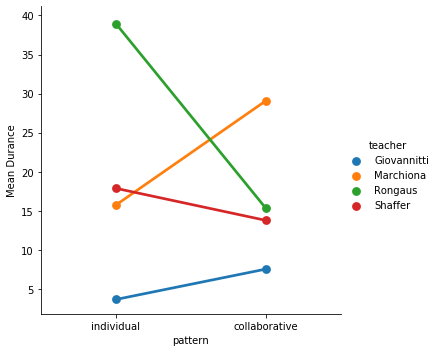

In [51]:
plot_learning_analysis('teacher','dur_mean','Mean Durance')

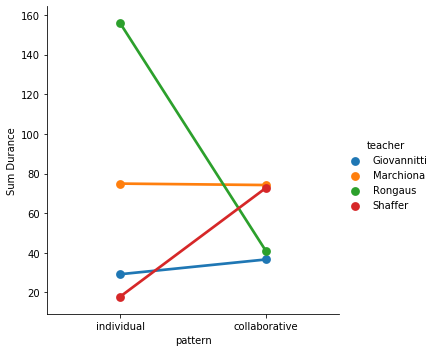

In [42]:
plot_learning_analysis('teacher','dur_sum','Sum Durance')

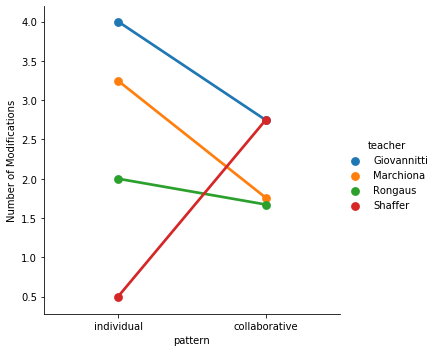

In [43]:
plot_learning_analysis('teacher','mod_num','Number of Modifications')

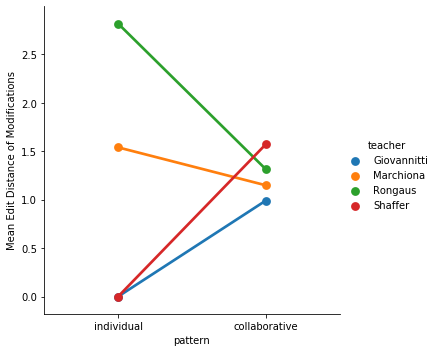

In [44]:
plot_learning_analysis('teacher','mod_ed_mean','Mean Edit Distance of Modifications')

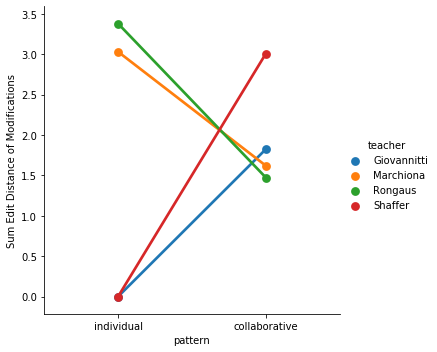

In [45]:
plot_learning_analysis('teacher','mod_ed_sum','Sum Edit Distance of Modifications')

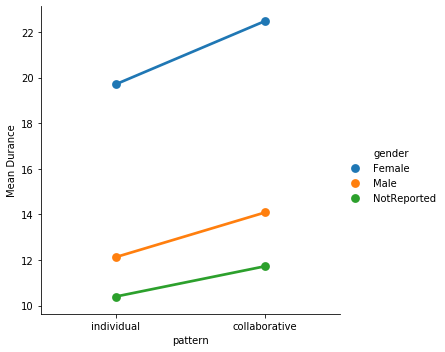

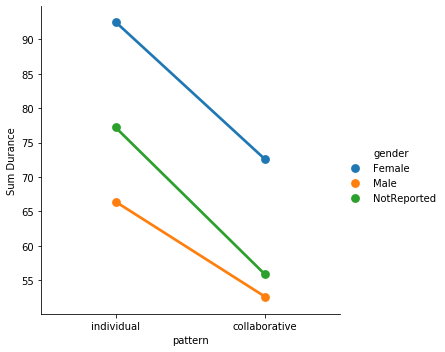

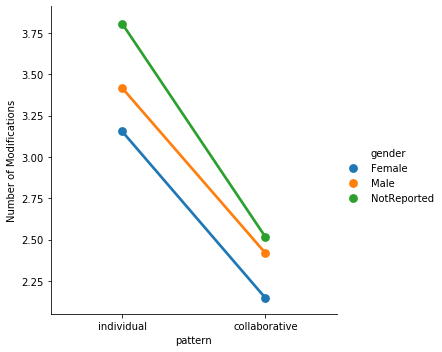

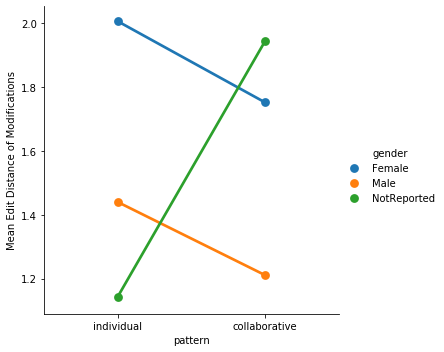

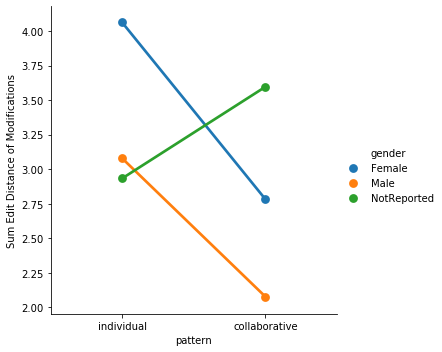

In [46]:
plot_learning_analysis('gender','dur_mean','Mean Durance')
plot_learning_analysis('gender','dur_sum','Sum Durance')
plot_learning_analysis('gender','mod_num','Number of Modifications')
plot_learning_analysis('gender','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis('gender','mod_ed_sum','Sum Edit Distance of Modifications')

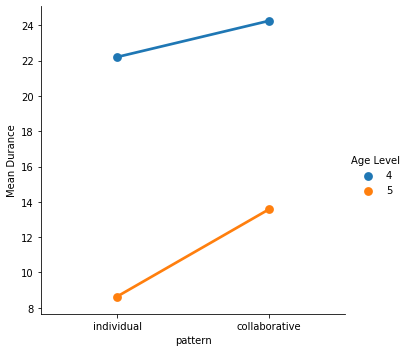

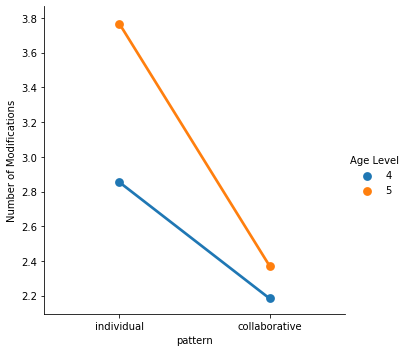

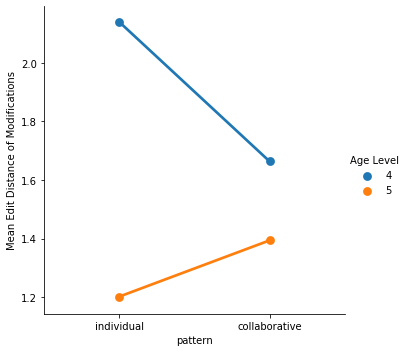

In [52]:
plot_learning_analysis('Age Level','dur_mean','Mean Durance')
plot_learning_analysis('Age Level','mod_num','Number of Modifications')
plot_learning_analysis('Age Level','mod_ed_mean','Mean Edit Distance of Modifications')

## Relationship between learning pattern and grade Improvement

In [53]:
data_1=pd.read_csv('textResponses_graded.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_1['test_type']='learning exercise'

for i in range(len(data_1)):
    try:
        data_1['Duration (sec)'][i]=float(data_1['Duration (sec)'][i])
    except:
        data_1['Duration (sec)'][i]=0.0
    if "know" in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='pre-test'
    elif 'learned' in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='post-test'


data_2=pd.read_csv('prepostReducedPartial.csv')
data_2['test_type']='learning exercise'

for i in range(len(data_2)):
    if "Pretest" in data_2['Test'][i]:
        data_2['test_type'][i]='pre-test'
    elif 'Posttest' in data_2['Test'][i]:
        data_2['test_type'][i]='post-test'


data_2=data_2.rename(index=str, columns={"TotalPercentage": "score",'ActualCondition':'pattern'})
data_2['score']=data_2['score']*100
data_2=data_2[['Student_ID','Teacher','Gender','score','test_type','Grade','pattern']]
data=pd.merge(data_1, data_2, on=['Student_ID','test_type'])
data.head()

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\torc

,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Level (Assignment),Level (ProblemSet),Problem Name,Problem View,...,Is Last Attempt,Input,correctness,answerType,test_type,Teacher,Gender,score,Grade,pattern
0,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,Show what you know A,Assessment_A,5,1,...,1,"no, because you don't change the denominater s...",1,p,pre-test,Deley,Male,22.222222,4,M
1,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,Show what you know A,Assessment_A,6,1,...,1,I do not know this answer.,0,n,pre-test,Deley,Male,22.222222,4,M
2,67cf78707ccc26e1e9637cdf9cf56a38,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:17,America/New_York,50,Show what you learned A,Assessment_A,5,1,...,1,I think her answer is right.,0,n,post-test,Shields,Male,51.851852,5,I
3,9524b2106c4398c0f080bd48595e766c,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:20,America/New_York,63,Show what you learned A,Assessment_A,6,1,...,1,would you want to have 32/65 of somthing or 32...,0,n,post-test,Shields,Male,51.851852,5,I
4,566fa61280783e071f0dc4ccb4d51f5f,Stu_03c1e9a4dde8c645a7554f75a1f33ea7,S41b8064a1f76e5b864cd40b0f1c87db9,2/19/16 10:49,America/New_York,198,Show what you know A,Assessment_A,5,1,...,1,I think that the picture is incorrect.I think ...,0,p,pre-test,Marchiona,Female,14.814815,4,M


In [54]:
for i in range(len(data)):
    if data.pattern.iloc[i][0]=='M':
        data.pattern.iloc[i]='mixed'
    if data.pattern.iloc[i][0]=='C':
        data.pattern.iloc[i]='collaborative'
    if data.pattern.iloc[i][0]=='I':
        data.pattern.iloc[i]='individual'

D:\anaconda\envs\torch\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
'''
students=data_1.Student_ID.value_counts().index
patterns=[]
for temp_stduent in students:
    temp_levels=data_1[data_1.Student_ID==temp_stduent]['Level (Assignment)'].value_counts().index
    temp_pattern='NotReported'
    for temp_level in temp_levels:
        if 'Collaboration' in temp_level :
            temp_pattern='collaborative'
            break
        if 'Individual' in temp_level:
            temp_pattern='individual'
            break
    patterns.append(temp_pattern)
student_pattern= pd.DataFrame({
    "Student_ID":students,
    "overall_pattern":patterns
})
new_data=pd.merge(data,student_pattern,on='Student_ID')
data=new_data
data.head()
'''

'\nstudents=data_1.Student_ID.value_counts().index\npatterns=[]\nfor temp_stduent in students:\n    temp_levels=data_1[data_1.Student_ID==temp_stduent][\'Level (Assignment)\'].value_counts().index\n    temp_pattern=\'NotReported\'\n    for temp_level in temp_levels:\n        if \'Collaboration\' in temp_level :\n            temp_pattern=\'collaborative\'\n            break\n        if \'Individual\' in temp_level:\n            temp_pattern=\'individual\'\n            break\n    patterns.append(temp_pattern)\nstudent_pattern= pd.DataFrame({\n    "Student_ID":students,\n    "overall_pattern":patterns\n})\nnew_data=pd.merge(data,student_pattern,on=\'Student_ID\')\ndata=new_data\ndata.head()\n'

In [56]:
group_data=data.groupby(['Student_ID'])[['Duration (sec)','pattern','Input','Problem Name','Grade','test_type','score']]

In [57]:
data_rows=[temp_row for temp_row in group_data]

In [58]:
data_rows[3][1]

,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Level (Assignment),Level (ProblemSet),Problem Name,Problem View,...,Is Last Attempt,Input,correctness,answerType,test_type,Teacher,Gender,score,Grade,pattern
6,66a46d326876f2d863aac6defbbd469f,Stu_04235a6a18782d9209667e4bbaeef1bd,S0a20044e774076db3dab35400c3cde38,5/23/16 9:55,America/New_York,86.5,Show what you learned A,Assessment_A,5,1,...,1,the 6 is right but the bottom is not right,0,u,post-test,Huffman,Female,43.209877,4,collaborative
7,b9121648191b26ccb3b65031bc4a1b61,Stu_04235a6a18782d9209667e4bbaeef1bd,S0a20044e774076db3dab35400c3cde38,5/23/16 9:56,America/New_York,36.5,Show what you learned A,Assessment_A,6,1,...,1,if you had a candy bar you would want bigger p...,1,c,post-test,Huffman,Female,43.209877,4,collaborative
575,e46754dbfdae3806dc9740b2113574fb,Stu_04235a6a18782d9209667e4bbaeef1bd,S64315f35a6d2932388c2a18487d6632c,5/16/16 9:44,America/New_York,41,Show what you know B,Assessment_B,5,1,...,1,no because you can not subtrack 9-4 in a fractoin,1,p,pre-test,Huffman,Female,16.049383,4,collaborative
576,f40ba38e9aa63e00c8a4229eae411e7c,Stu_04235a6a18782d9209667e4bbaeef1bd,S64315f35a6d2932388c2a18487d6632c,5/16/16 9:46,America/New_York,34.5,Show what you know B,Assessment_B,6,1,...,1,if you cut it in peaices you would have bigger...,1,c,pre-test,Huffman,Female,16.049383,4,collaborative


In [59]:
ind_improve_s=[]
col_improve_s=[]
mix_improve_s=[]
ind_improve_g=[]
col_improve_g=[]
mix_improve_g=[]

for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative':
        temp_df=temp_row[1]
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['score'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['score'])
        temp_improve=temp_post-temp_pre
        if temp_improve>=-100 and temp_improve<=100:
            col_improve_s.append(temp_improve)
            
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['Grade'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['Grade'])
        temp_improve=temp_post-temp_pre
        col_improve_g.append(temp_post)
        
    elif temp_row[1].pattern.iloc[0]=='individual':
        temp_df=temp_row[1]
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['score'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['score'])
        temp_improve=temp_post-temp_pre
        if temp_improve>=-100 and temp_improve<=100:
            ind_improve_s.append(temp_improve)
            
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['Grade'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['Grade'])
        temp_improve=temp_post-temp_pre
        ind_improve_g.append(temp_post)
            
    elif temp_row[1].pattern.iloc[0]=='mixed':
        temp_df=temp_row[1]
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['score'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['score'])
        temp_improve=temp_post-temp_pre
        if temp_improve>=-100 and temp_improve<=100:
            mix_improve_s.append(temp_improve)
            
        temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['Grade'])
        temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['Grade'])
        temp_improve=temp_post-temp_pre
        mix_improve_g.append(temp_post)

In [60]:
stats.ttest_ind(np.array(ind_improve_s),np.array(col_improve_s),equal_var = False)

Ttest_indResult(statistic=-1.749472574232558, pvalue=0.08215155189248789)

In [61]:
stats.ttest_ind(np.array(ind_improve_s),np.array(mix_improve_s),equal_var = False)

Ttest_indResult(statistic=-1.641283521002847, pvalue=0.10284093079717808)

In [64]:
stats.f_oneway(ind_improve_s, col_improve_s,mix_improve_s)

F_onewayResult(statistic=1.96082174568111, pvalue=0.14274918484748964)

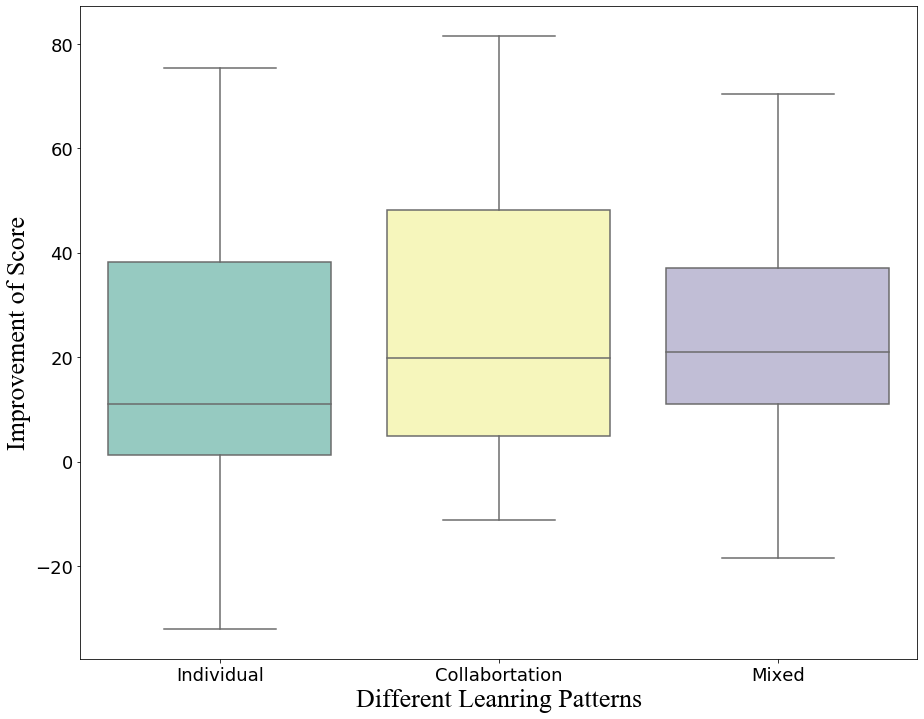

In [42]:
patterns=["Individual"]*len(ind_improve_s)+ ['Collabortation']*len(col_improve_s)+['Mixed']*len(mix_improve_s)
values=np.concatenate((ind_improve_s,col_improve_s,mix_improve_s))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Improvement of Score":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Improvement of Score", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Improvement of Score',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

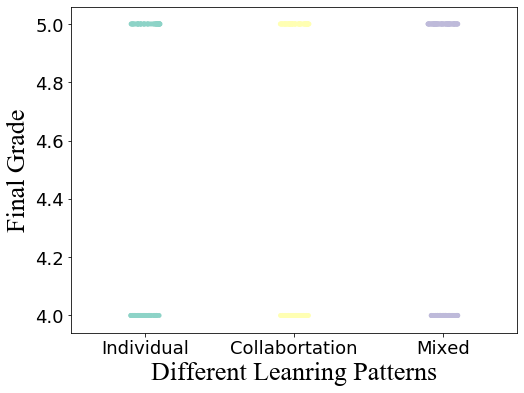

In [55]:
patterns=["Individual"]*len(ind_improve_g)+ ['Collabortation']*len(col_improve_g)+['Mixed']*len(mix_improve_g)
values=np.concatenate((ind_improve_g,col_improve_g,mix_improve_g))
fig,axes = plt.subplots(1,1,figsize=(8,6))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Final Grade":values
})

ax = sns.stripplot(x="Different Leanring Patterns", y="Final Grade", data=my_data,palette="Set3")
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Final Grade',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

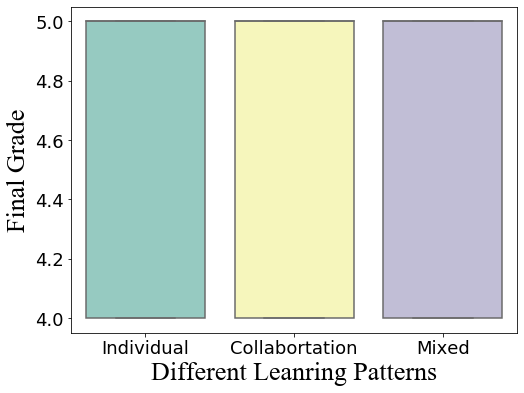

In [56]:
patterns=["Individual"]*len(ind_improve_g)+ ['Collabortation']*len(col_improve_g)+['Mixed']*len(mix_improve_g)
values=np.concatenate((ind_improve_g,col_improve_g,mix_improve_g))
fig,axes = plt.subplots(1,1,figsize=(8,6))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Final Grade":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Final Grade", data=my_data,palette="Set3")
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Final Grade',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

In [61]:
ind_improve_g=np.array(ind_improve_g)
col_improve_g=np.array(col_improve_g)
mix_improve_g=np.array(mix_improve_g)
ind_improve_g=ind_improve_g[ind_improve_g>0]
col_improve_g=col_improve_g[col_improve_g>0]
mix_improve_g=mix_improve_g[mix_improve_g>0]

D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [62]:
print('Mean grade of individual students: '+str(np.mean(ind_improve_g)))
print('Mean grade of collaborative students: '+str(np.mean(col_improve_g)))
print('Mean grade of mixed students: '+str(np.mean(mix_improve_g)))

Mean grade of individual students: 4.530120481927711
Mean grade of collaborative students: 4.623762376237623
Mean grade of mixed students: 4.529411764705882


In [403]:
improvements=[]

for temp_row in data_rows:
    temp_df=temp_row[1]
    temp_pre=np.mean(temp_df[temp_df.test_type=='pre-test']['grade'])
    temp_post=np.mean(temp_df[temp_df.test_type=='post-test']['grade'])
    temp_improve=temp_post-temp_pre
    improvements.append(temp_improve)

In [404]:
students=[temp_row[0] for temp_row in data_rows]

In [405]:
student_improvement= pd.DataFrame({
    "Student_ID":students,
    "improvement":improvements
})

In [406]:
students=data_1.Student_ID.value_counts().index
patterns=[]
for temp_stduent in students:
    temp_levels=data_1[data_1.Student_ID==temp_stduent]['Level (Assignment)'].value_counts().index
    temp_pattern='NotReported'
    for temp_level in temp_levels:
        if 'Collaboration' in temp_level :
            temp_pattern='collaborative'
            break
        if 'Individual' in temp_level:
            temp_pattern='individual'
            break
    patterns.append(temp_pattern)
student_pattern= pd.DataFrame({
    "Student_ID":students,
    "overall_pattern":patterns
})

In [408]:
temp_data=pd.merge(data_2,student_pattern,on='Student_ID')
temp_data=pd.merge(temp_data,student_improvement,on='Student_ID')

In [416]:
temp_data.head()

,Student_ID,Teacher,Gender,grade,test_type,overall_pattern,improvement
0,Stu_005a9729f8e3869ff12b105e0f7bb82e,Deley,Male,22.222222,pre-test,collaborative,54.320988
1,Stu_005a9729f8e3869ff12b105e0f7bb82e,Deley,Male,76.543210,post-test,collaborative,54.320988
2,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Shields,Male,11.111111,pre-test,individual,40.740741
3,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Shields,Male,51.851852,post-test,individual,40.740741
4,Stu_03c1e9a4dde8c645a7554f75a1f33ea7,Marchiona,Female,14.814815,pre-test,collaborative,45.679012


In [417]:
def plot_improvement_analysis(feature_1, feature_2, label_y):
    temp_col_df = temp_data[temp_data.overall_pattern=='collaborative']
    temp_ind_df = temp_data[temp_data.overall_pattern=='individual']
    temp_col_df= temp_col_df.groupby(feature_1)[[feature_2]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({feature_1:temp_col_df.index,'collaborative':np.array(temp_col_df[feature_2])})
    temp_ind_df= temp_ind_df.groupby(feature_1)[[feature_2]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({feature_1:temp_ind_df.index,'individual':np.array(temp_ind_df[feature_2])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df[feature_1]
    temp_df = temp_df.loc[:,['individual','collaborative']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"pattern","0":label_y},inplace=True)
    sns.catplot(x="pattern", y=label_y, hue=feature_1,kind="point", data=temp_df)
    plt.show()
    

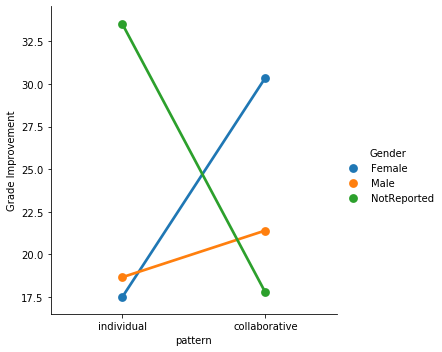

In [423]:
plot_improvement_analysis('Gender','improvement','Grade Improvement')

# Comparison of pre-test and post-test

In [65]:
data_1=pd.read_csv('textResponses.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_1['test_type']='learning exercise'

for i in range(len(data_1)):
    try:
        data_1['Duration (sec)'][i]=float(data_1['Duration (sec)'][i])
    except:
        data_1['Duration (sec)'][i]=0.0
    if "know" in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='pre-test'
    elif 'learned' in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='post-test'


data_2=pd.read_csv('prepostReducedPartial.csv')
data_2['test_type']='learning exercise'

for i in range(len(data_2)):
    if "Pretest" in data_2['Test'][i]:
        data_2['test_type'][i]='pre-test'
    elif 'Posttest' in data_2['Test'][i]:
        data_2['test_type'][i]='post-test'


data_2=data_2.rename(index=str, columns={"TotalPercentage": "grade",'Grade':'age'})
data_2['grade']=data_2['grade']*100
data_2=data_2[['Student_ID','Teacher','Gender','grade','test_type','age']]
data=pd.merge(data_1, data_2, on=['Student_ID','test_type'])
data.head()

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\torc

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,grade,age
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222,4
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222,4
2,3315,All Data,630a500c45ba54bd7ee5f66857df6539,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:26,America/New_York,81.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-09 16:26:58.846 UTC,2016-05-09 16:26:58.896 UTC,post-test,Deley,Male,76.543210,4
3,3317,All Data,9aed6b18d9bd5b6371d871736821c853,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:29,America/New_York,60.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-09 16:29:02.449 UTC,2016-05-09 16:29:02.504 UTC,post-test,Deley,Male,76.543210,4
4,3983,All Data,5605ac32fa79cc8760df9c91f047dba4,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,S8149b22ef12e3677674b1030a1e98fb0,5/16/16 9:42,America/New_York,151,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-16 13:42:30.808 UTC,2016-05-16 13:42:30.850 UTC,pre-test,Shields,Male,11.111111,5


In [66]:
group_data=data.groupby(['Student_ID','Level (Assignment)'])[['Duration (sec)','Input','Problem Name','grade','test_type','age']]

In [67]:
data_rows=[temp_row for temp_row in group_data]
data_rows[0][1]

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,grade,age
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222,4
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222,4


In [341]:
from nltk.metrics import edit_distance
pre_duration_mean=[]
pre_duration_sum=[]
pre_mod_num=[]
pre_mod_ed_mean=[]
pre_mod_ed_sum=[]
pre_grade=[]

post_duration_mean=[]
post_duration_sum=[]
post_mod_num=[]
post_mod_ed_mean=[]
post_mod_ed_sum=[]
post_grade=[]

for temp_row in data_rows:
    if temp_row[1].test_type.iloc[0]=='pre-test':
        temp_mean_grade=np.max(temp_row[1]['grade'])
        pre_grade.append(temp_mean_grade)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        pre_duration_mean.append(temp_durance_mean)
        pre_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        pre_mod_num.append(temp_mod_num)
        pre_mod_ed_mean.append(temp_mod_mean)
        pre_mod_ed_sum.append(temp_mod_sum)
                        
            
            
                                
    elif temp_row[1].test_type.iloc[0]=='post-test':
        temp_mean_grade=np.max(temp_row[1]['grade'])
        post_grade.append(temp_mean_grade)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        post_duration_mean.append(temp_durance_mean)
        post_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        post_mod_num.append(temp_mod_num)
        post_mod_ed_mean.append(temp_mod_mean)
        post_mod_ed_sum.append(temp_mod_sum)
    
    

### mean durance

In [326]:
stats.ttest_ind(pre_duration_mean,post_duration_mean,equal_var = False)

Ttest_indResult(statistic=5.711451579480084, pvalue=1.8277768251250667e-08)

In [327]:
stats.f_oneway(pre_duration_mean, post_duration_mean)

F_onewayResult(statistic=32.933858279525374, pvalue=1.5424494039716774e-08)

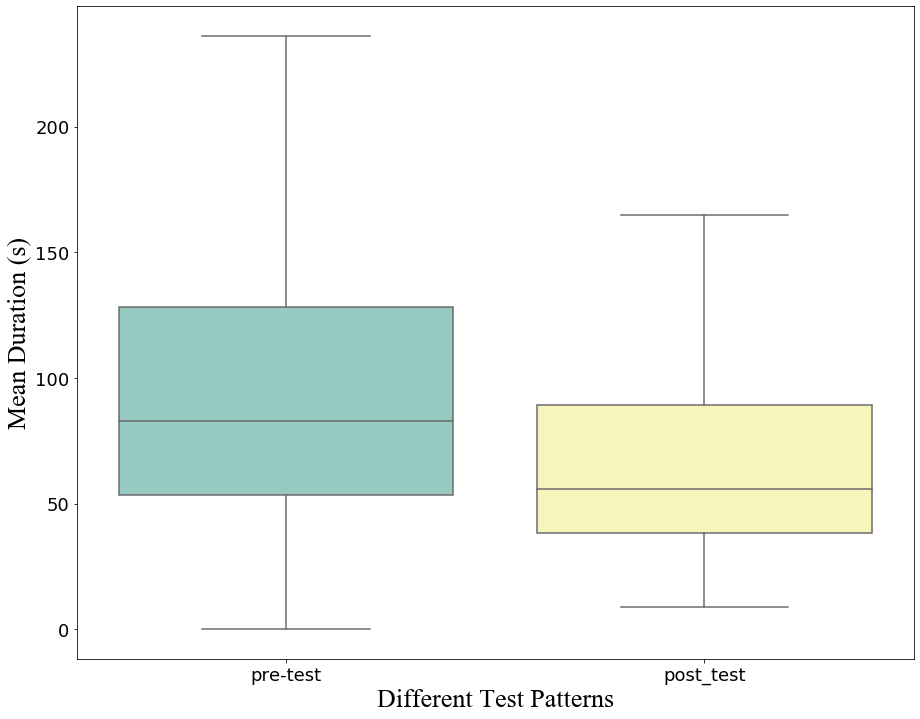

In [328]:
patterns=["pre-test"]*len(pre_duration_mean)+ ['post_test']*len(post_duration_mean)
values=np.concatenate((pre_duration_mean,post_duration_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Mean Duration (s)":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Mean Duration (s)", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Mean Duration (s)',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### Number of modifications

In [343]:
stats.ttest_ind(pre_mod_num,post_mod_num,equal_var = False)

Ttest_indResult(statistic=0.48427780719317515, pvalue=0.628384279471031)

In [344]:
stats.f_oneway(pre_mod_num, post_mod_num)

F_onewayResult(statistic=0.23805311697286513, pvalue=0.6258014689689968)

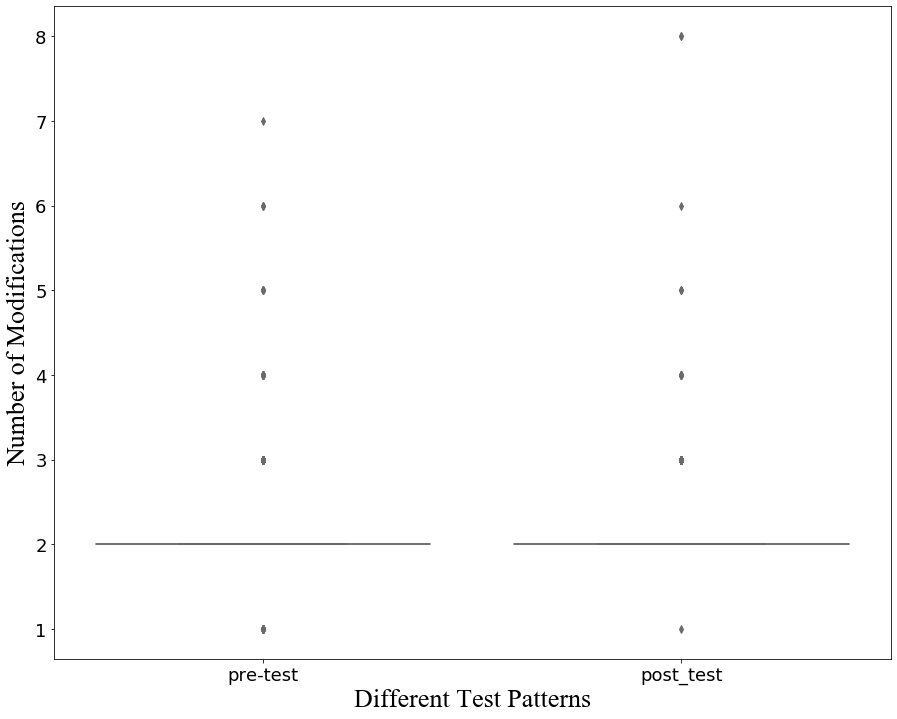

In [352]:
patterns=["pre-test"]*len(pre_mod_num)+ ['post_test']*len(post_mod_num)
values=np.concatenate((pre_mod_num,post_mod_num))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Number of Modifications":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Number of Modifications", data=my_data,palette="Set3",showfliers = True)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Number of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### mean edit distance

In [346]:
stats.ttest_ind(pre_mod_ed_mean,post_mod_ed_mean,equal_var = False)

Ttest_indResult(statistic=2.0064624715447366, pvalue=0.045374788610716796)

In [347]:
stats.f_oneway(pre_mod_ed_mean, post_mod_ed_mean)

F_onewayResult(statistic=4.174976428077037, pvalue=0.041479645222102325)

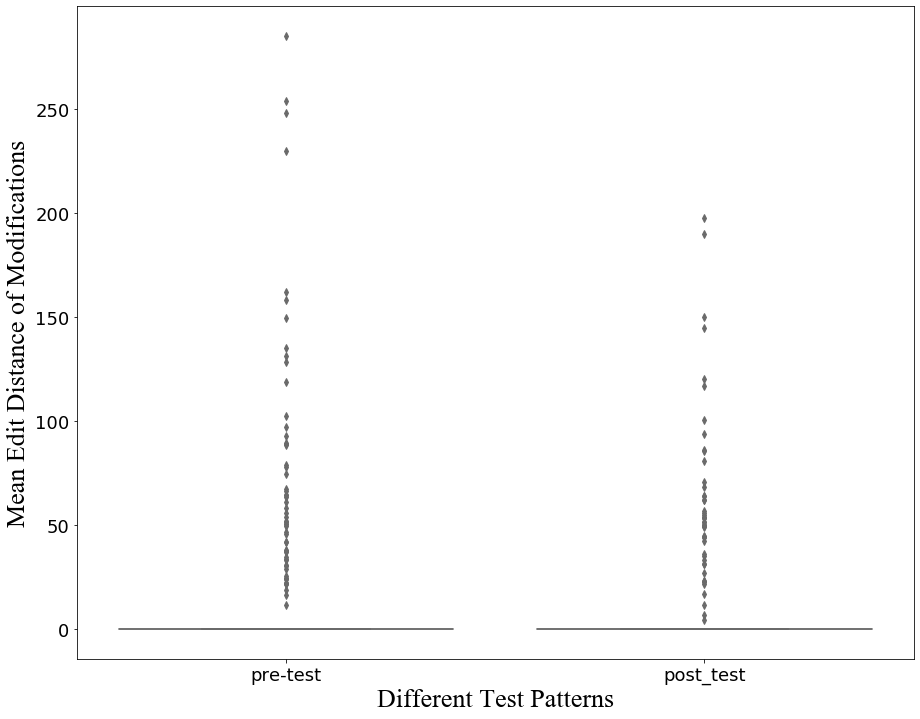

In [351]:
patterns=["pre-test"]*len(pre_mod_ed_mean)+ ['post_test']*len(post_mod_ed_mean)
values=np.concatenate((pre_mod_ed_mean,post_mod_ed_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Mean Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Mean Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = True)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Mean Edit Distance of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### sum edit distance

In [ ]:
pre_mod_ed_sum=np.array(pre_mod_ed_sum)/50
post_mod_ed_sum=np.array(post_mod_ed_sum)/50

In [ ]:
stats.ttest_ind(pre_mod_ed_sum,post_mod_ed_sum,equal_var = False)

In [ ]:
stats.f_oneway(pre_mod_ed_sum, post_mod_ed_sum)

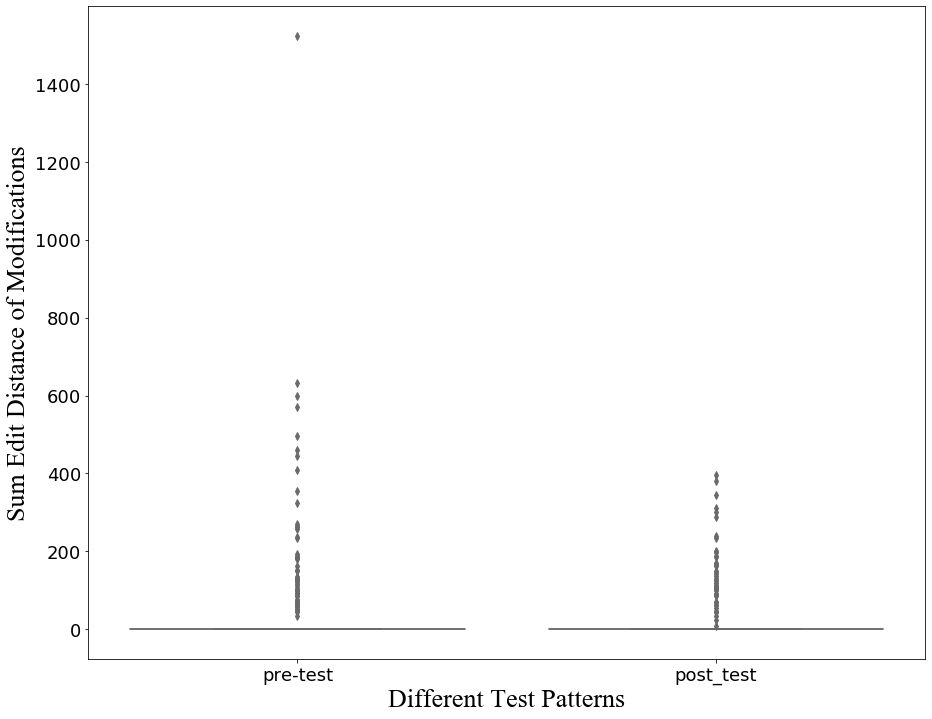

In [350]:
patterns=["pre-test"]*len(pre_mod_ed_sum)+ ['post_test']*len(post_mod_ed_sum)
values=np.concatenate((pre_mod_ed_sum,post_mod_ed_sum))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Sum Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Sum Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = True)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Sum Edit Distance of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### grade

In [355]:
stats.ttest_ind(pre_grade,post_grade,equal_var = False)

Ttest_indResult(statistic=-11.73268479443445, pvalue=1.2722106607283418e-28)

In [356]:
stats.f_oneway(pre_grade, post_grade)

F_onewayResult(statistic=137.80572658094454, pvalue=1.1123410554223694e-28)

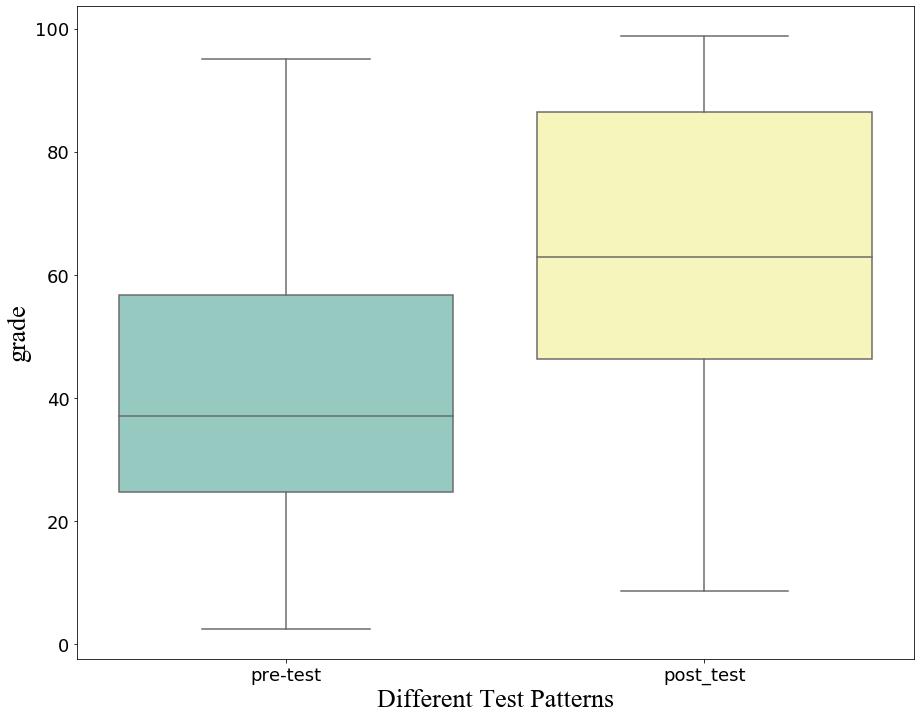

In [359]:
patterns=["pre-test"]*len(pre_grade)+ ['post_test']*len(post_grade)
values=np.concatenate((pre_grade,post_grade))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "grade":values
})

ax = sns.boxplot(x="Different Test Patterns", y="grade", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('grade',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Interaction effect of test type

In [68]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]
grades=[]

patterns=[]
genders=[]
teachers=[]
tests=[]

ages=[]


for temp_row in data_rows:
    if temp_row[1].test_type.iloc[0]=='pre-test' or temp_row[1].test_type.iloc[0]=='post-test':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        temp_grade=np.max(temp_row[1]['grade'])
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)
        grades.append(temp_grade)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        temp_test=temp_row[1].test_type.iloc[0]
        temp_age=temp_row[1].age.iloc[0]
        ages.append(temp_age)
        genders.append(temp_gender)
        teachers.append(temp_teacher)
        tests.append(temp_test)


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



In [70]:
for i in range(len(ana_df)):
    ana_df.mod_ed_mean.iloc[i]=int(ana_df.mod_ed_mean.iloc[i]/3)
    ana_df.mod_ed_sum.iloc[i]=int(ana_df.mod_ed_sum.iloc[i]/3)



In [71]:
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum), 'grade':np.array(grades), 
                     'Age Level':np.array(ages),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'teacher':np.array(teachers),'gender':np.array(genders),'test':np.array(tests),'Age Level': np.array(ages) })


In [72]:
def plot_learning_analysis_test(feature_1, feature_2, label_y):
    temp_col_df = ana_df[ana_df.test=='pre-test']
    temp_ind_df = ana_df[ana_df.test=='post-test']
    temp_col_df= temp_col_df.groupby(feature_1)[[feature_2]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({feature_1:temp_col_df.index,'pre-test':np.array(temp_col_df[feature_2])})
    temp_ind_df= temp_ind_df.groupby(feature_1)[[feature_2]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({feature_1:temp_ind_df.index,'post-test':np.array(temp_ind_df[feature_2])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df[feature_1]
    temp_df = temp_df.loc[:,['pre-test','post-test']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"test","0":label_y},inplace=True)
    sns.catplot(x="test", y=label_y, hue=feature_1,kind="point", data=temp_df)
    plt.show()
    

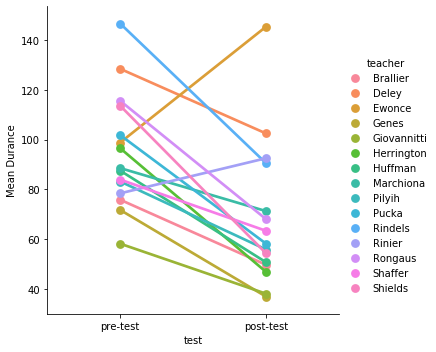

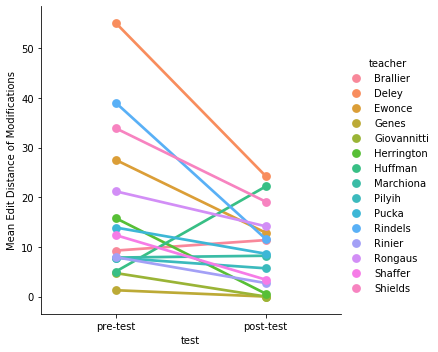

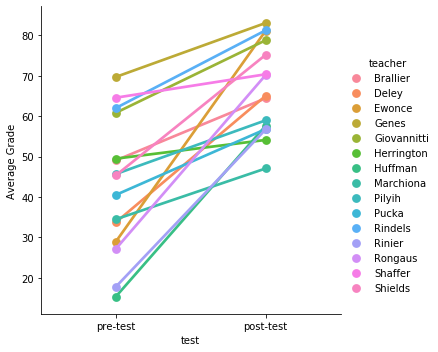

In [73]:
plot_learning_analysis_test('teacher','dur_mean','Mean Durance')
plot_learning_analysis_test('teacher','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test('teacher','grade','Average Grade')

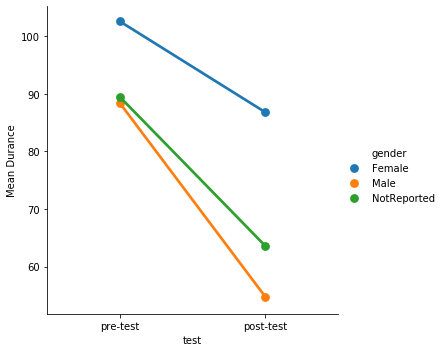

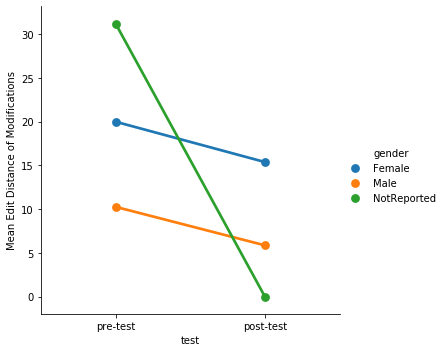

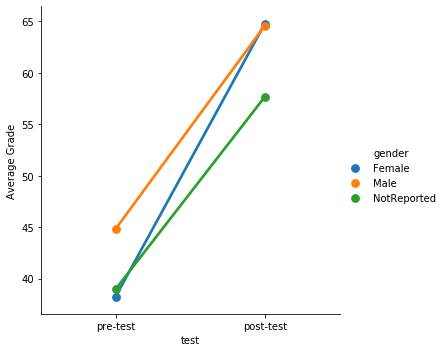

In [74]:
plot_learning_analysis_test('gender','dur_mean','Mean Durance')
plot_learning_analysis_test('gender','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test('gender','grade','Average Grade')

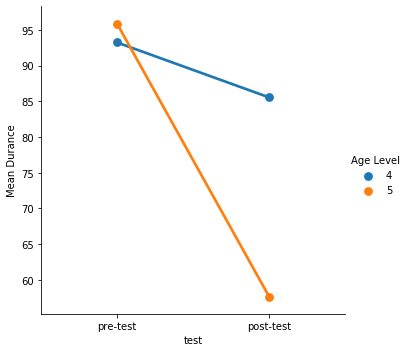

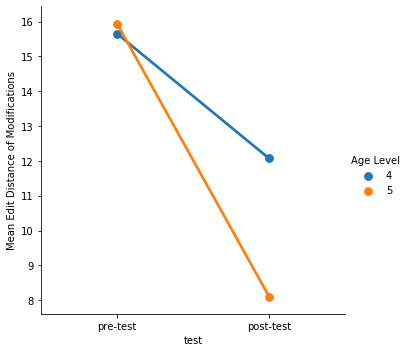

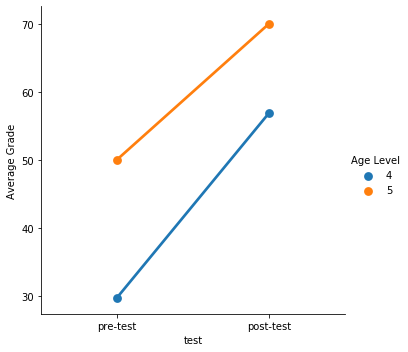

In [75]:
plot_learning_analysis_test('Age Level','dur_mean','Mean Durance')
plot_learning_analysis_test('Age Level','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test('Age Level','grade','Average Grade')

# Interaction effect of test type and learning pattern

In [192]:
data_1=pd.read_csv('textResponses.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_1['test_type']='learning exercise'

for i in range(len(data_1)):
    try:
        data_1['Duration (sec)'][i]=float(data_1['Duration (sec)'][i])
    except:
        data_1['Duration (sec)'][i]=0.0
    if "know" in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='pre-test'
    elif 'learned' in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='post-test'


data_2=pd.read_csv('prepostReducedPartial.csv')
data_2['test_type']='learning exercise'

for i in range(len(data_2)):
    if "Pretest" in data_2['Test'][i]:
        data_2['test_type'][i]='pre-test'
    elif 'Posttest' in data_2['Test'][i]:
        data_2['test_type'][i]='post-test'


data_2=data_2.rename(index=str, columns={"TotalPercentage": "grade"})
data_2['grade']=data_2['grade']*100
data_2=data_2[['Student_ID','Teacher','Gender','grade','test_type']]
data=pd.merge(data_1, data_2, on=['Student_ID','test_type'])
data.head()

D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\ntds\li

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,grade
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222
2,3315,All Data,630a500c45ba54bd7ee5f66857df6539,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:26,America/New_York,81.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-09 16:26:58.846 UTC,2016-05-09 16:26:58.896 UTC,post-test,Deley,Male,76.543210
3,3317,All Data,9aed6b18d9bd5b6371d871736821c853,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:29,America/New_York,60.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-09 16:29:02.449 UTC,2016-05-09 16:29:02.504 UTC,post-test,Deley,Male,76.543210
4,3983,All Data,5605ac32fa79cc8760df9c91f047dba4,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,S8149b22ef12e3677674b1030a1e98fb0,5/16/16 9:42,America/New_York,151,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-16 13:42:30.808 UTC,2016-05-16 13:42:30.850 UTC,pre-test,Shields,Male,11.111111


In [193]:
students=data_1.Student_ID.value_counts().index
patterns=[]
for temp_stduent in students:
    temp_levels=data_1[data_1.Student_ID==temp_stduent]['Level (Assignment)'].value_counts().index
    temp_pattern='NotReported'
    for temp_level in temp_levels:
        if 'Collaboration' in temp_level :
            temp_pattern='collaborative'
            break
        if 'Individual' in temp_level:
            temp_pattern='individual'
            break
    patterns.append(temp_pattern)

In [194]:
patterns[:10]

['individual',
 'collaborative',
 'individual',
 'individual',
 'collaborative',
 'collaborative',
 'individual',
 'collaborative',
 'individual',
 'individual']

In [195]:
len(patterns)

426

In [276]:
student_pattern= pd.DataFrame({
    "Student_ID":students,
    "overall_pattern":patterns
})

In [277]:
student_pattern

,Student_ID,overall_pattern
0,Stu_b2fe63b2cee5a3074da50bd17bb7e0ce,collaborative
1,Stu_0ef867b98e880e80e360e8d5f56cf095,individual
2,Stu_075a11e1b4fbee4969b0b0146a2ffec4,collaborative
3,Stu_e2e9d5bdc30bf6061f08df38182c5574,individual
4,Stu_bc9ca7dddebb11b58ea4e12c960e893e,individual
...,...,...
421,Stu_07c54f646f820f5200ee23d1ebb9b3b1,individual
422,Stu_f80727c80dc0890aa7900900540c767d,NotReported
423,Stu_37d3b58fd56155786d9eac47bc796a0c,NotReported
424,Stu_700ecf016a30e9b3357883081895df9d,NotReported


In [278]:
new_data=pd.merge(data,student_pattern,on='Student_ID')
data=new_data
data.head()

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,grade,overall_pattern
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222,collaborative
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222,collaborative
2,3315,All Data,630a500c45ba54bd7ee5f66857df6539,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:26,America/New_York,81.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-09 16:26:58.846 UTC,2016-05-09 16:26:58.896 UTC,post-test,Deley,Male,76.543210,collaborative
3,3317,All Data,9aed6b18d9bd5b6371d871736821c853,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:29,America/New_York,60.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-09 16:29:02.449 UTC,2016-05-09 16:29:02.504 UTC,post-test,Deley,Male,76.543210,collaborative
4,3983,All Data,5605ac32fa79cc8760df9c91f047dba4,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,S8149b22ef12e3677674b1030a1e98fb0,5/16/16 9:42,America/New_York,151,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-16 13:42:30.808 UTC,2016-05-16 13:42:30.850 UTC,pre-test,Shields,Male,11.111111,individual


In [196]:
data_1=pd.read_csv('textResponses_graded.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_1['test_type']='learning exercise'

for i in range(len(data_1)):
    try:
        data_1['Duration (sec)'][i]=float(data_1['Duration (sec)'][i])
    except:
        data_1['Duration (sec)'][i]=0.0
    if "know" in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='pre-test'
    elif 'learned' in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='post-test'


data_2=pd.read_csv('prepostReducedPartial.csv')
data_2['test_type']='learning exercise'

for i in range(len(data_2)):
    if "Pretest" in data_2['Test'][i]:
        data_2['test_type'][i]='pre-test'
    elif 'Posttest' in data_2['Test'][i]:
        data_2['test_type'][i]='post-test'


data_2=data_2.rename(index=str, columns={"TotalPercentage": "score",'ActualCondition':'pattern'})
data_2['score']=data_2['score']*100
data_2=data_2[['Student_ID','Teacher','Gender','score','test_type','Grade','pattern']]
data=pd.merge(data_1, data_2, on=['Student_ID','test_type'])
for i in range(len(data)):
    if data.pattern.iloc[i][0]=='M':
        data.pattern.iloc[i]='mixed'
    if data.pattern.iloc[i][0]=='C':
        data.pattern.iloc[i]='collaborative'
    if data.pattern.iloc[i][0]=='I':
        data.pattern.iloc[i]='individual'
data.head()

D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\ntds\li

,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Level (Assignment),Level (ProblemSet),Problem Name,Problem View,...,Is Last Attempt,Input,correctness,answerType,test_type,Teacher,Gender,score,Grade,pattern
0,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,Show what you know A,Assessment_A,5,1,...,1,"no, because you don't change the denominater s...",1,p,pre-test,Deley,Male,22.222222,4,mixed
1,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,Show what you know A,Assessment_A,6,1,...,1,I do not know this answer.,0,n,pre-test,Deley,Male,22.222222,4,mixed
2,67cf78707ccc26e1e9637cdf9cf56a38,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:17,America/New_York,50,Show what you learned A,Assessment_A,5,1,...,1,I think her answer is right.,0,n,post-test,Shields,Male,51.851852,5,individual
3,9524b2106c4398c0f080bd48595e766c,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:20,America/New_York,63,Show what you learned A,Assessment_A,6,1,...,1,would you want to have 32/65 of somthing or 32...,0,n,post-test,Shields,Male,51.851852,5,individual
4,566fa61280783e071f0dc4ccb4d51f5f,Stu_03c1e9a4dde8c645a7554f75a1f33ea7,S41b8064a1f76e5b864cd40b0f1c87db9,2/19/16 10:49,America/New_York,198,Show what you know A,Assessment_A,5,1,...,1,I think that the picture is incorrect.I think ...,0,p,pre-test,Marchiona,Female,14.814815,4,mixed


In [197]:
group_data=data.groupby(['Student_ID','Level (Assignment)'])[['Duration (sec)','pattern','Input','Problem Name','Grade','test_type','score']]

In [198]:
data_rows=[temp_row for temp_row in group_data]

In [199]:
data_rows[3][1]

,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Level (Assignment),Level (ProblemSet),Problem Name,Problem View,...,Is Last Attempt,Input,correctness,answerType,test_type,Teacher,Gender,score,Grade,pattern
2,67cf78707ccc26e1e9637cdf9cf56a38,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:17,America/New_York,50,Show what you learned A,Assessment_A,5,1,...,1,I think her answer is right.,0,n,post-test,Shields,Male,51.851852,5,individual
3,9524b2106c4398c0f080bd48595e766c,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:20,America/New_York,63,Show what you learned A,Assessment_A,6,1,...,1,would you want to have 32/65 of somthing or 32...,0,n,post-test,Shields,Male,51.851852,5,individual


In [200]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]
grades=[]
scores=[]

patterns=[]
genders=[]
teachers=[]
tests=[]


for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative' or temp_row[1].pattern.iloc[0]=='individual' or temp_row[1].pattern.iloc[0]=='mixed':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        temp_grade=np.max(temp_row[1]['Grade'])
        temp_score=np.max(temp_row[1]['score'])
        
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)
        grades.append(temp_grade)
        scores.append(temp_score)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_pattern=temp_row[1].pattern.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        temp_test=temp_row[1].test_type.iloc[0]
        patterns.append(temp_pattern)
        genders.append(temp_gender)
        teachers.append(temp_teacher)
        tests.append(temp_test)


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)/len(temp_mod_ed_list+1)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



In [201]:
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum),
                     'grade':np.array(grades),'score':np.array(scores),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'pattern':np.array(patterns), 'teacher':np.array(teachers),'gender':np.array(genders),'test':np.array(tests) })


In [202]:
for i in range(len(ana_df)):
    ana_df.mod_ed_mean.iloc[i]=int(ana_df.mod_ed_mean.iloc[i]/7)
    ana_df.mod_ed_sum.iloc[i]=int(ana_df.mod_ed_sum.iloc[i]/7)



In [203]:
ana_df.head()

,dur_mean,dur_sum,grade,score,mod_num,mod_ed_mean,mod_ed_sum,pattern,teacher,gender,test
0,356.75,713.5,4,22.222222,2,7.0,7,mixed,Deley,Male,pre-test
1,71.00,142.0,4,76.543210,2,0.0,0,mixed,Deley,Male,post-test
2,175.50,351.0,5,11.111111,2,8.0,8,individual,Shields,Male,pre-test
3,56.50,113.0,5,51.851852,2,5.0,5,individual,Shields,Male,post-test
4,172.50,345.0,4,14.814815,2,13.0,13,mixed,Marchiona,Female,pre-test


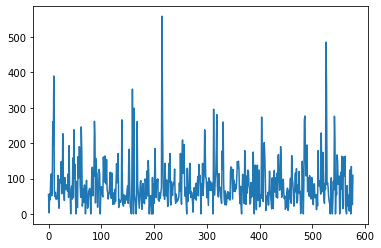

In [204]:
plt.plot(mod_ed_mean)

In [205]:
def plot_learning_analysis_test_pattern( feature, label_y):
    temp_col_df = ana_df[ana_df['test']=='pre-test']
    temp_ind_df = ana_df[ana_df['test']=='post-test']
    
    temp_col_df= temp_col_df.groupby('pattern')[[feature]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({'pattern':temp_col_df.index,'pre-test':np.array(temp_col_df[feature])})
    
    temp_ind_df= temp_ind_df.groupby('pattern')[[feature]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({'pattern':temp_ind_df.index,'post-test':np.array(temp_ind_df[feature])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df['pattern']
    temp_df = temp_df.loc[:,['pre-test','post-test']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"test","0":label_y},inplace=True)
    sns.catplot(x="test", y=label_y, hue='pattern',kind="point", data=temp_df)
    plt.show()

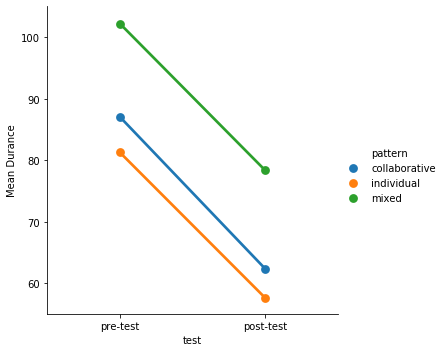

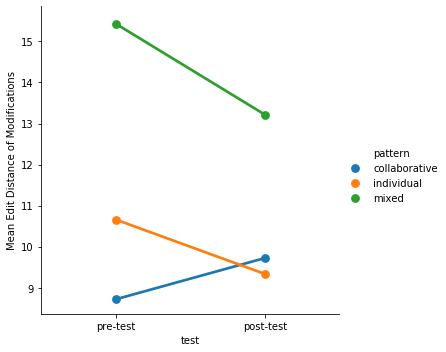

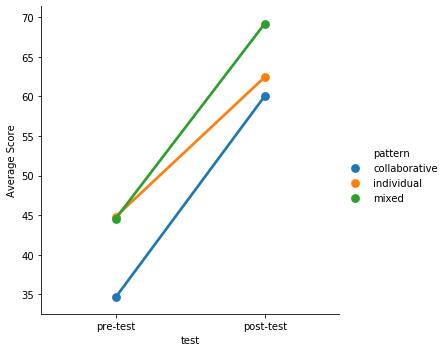

In [206]:
plot_learning_analysis_test_pattern('dur_mean','Mean Durance')
plot_learning_analysis_test_pattern('mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test_pattern('score','Average Score')

# comparison of learning patterns in post-test

In [76]:
data_1=pd.read_csv('textResponses_graded.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_1['test_type']='learning exercise'

for i in range(len(data_1)):
    try:
        data_1['Duration (sec)'][i]=float(data_1['Duration (sec)'][i])
    except:
        data_1['Duration (sec)'][i]=0.0
    if "know" in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='pre-test'
    elif 'learned' in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='post-test'


data_2=pd.read_csv('prepostReducedPartial.csv')
data_2['test_type']='learning exercise'

for i in range(len(data_2)):
    if "Pretest" in data_2['Test'][i]:
        data_2['test_type'][i]='pre-test'
    elif 'Posttest' in data_2['Test'][i]:
        data_2['test_type'][i]='post-test'


data_2=data_2.rename(index=str, columns={"TotalPercentage": "score",'ActualCondition':'pattern'})
data_2['score']=data_2['score']*100
data_2=data_2[['Student_ID','Teacher','Gender','score','test_type','Grade','pattern']]
data=pd.merge(data_1, data_2, on=['Student_ID','test_type'])
for i in range(len(data)):
    if data.pattern.iloc[i][0]=='M':
        data.pattern.iloc[i]='mixed'
    if data.pattern.iloc[i][0]=='C':
        data.pattern.iloc[i]='collaborative'
    if data.pattern.iloc[i][0]=='I':
        data.pattern.iloc[i]='individual'
data.head()

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\torc

,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Level (Assignment),Level (ProblemSet),Problem Name,Problem View,...,Is Last Attempt,Input,correctness,answerType,test_type,Teacher,Gender,score,Grade,pattern
0,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,Show what you know A,Assessment_A,5,1,...,1,"no, because you don't change the denominater s...",1,p,pre-test,Deley,Male,22.222222,4,mixed
1,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,Show what you know A,Assessment_A,6,1,...,1,I do not know this answer.,0,n,pre-test,Deley,Male,22.222222,4,mixed
2,67cf78707ccc26e1e9637cdf9cf56a38,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:17,America/New_York,50,Show what you learned A,Assessment_A,5,1,...,1,I think her answer is right.,0,n,post-test,Shields,Male,51.851852,5,individual
3,9524b2106c4398c0f080bd48595e766c,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:20,America/New_York,63,Show what you learned A,Assessment_A,6,1,...,1,would you want to have 32/65 of somthing or 32...,0,n,post-test,Shields,Male,51.851852,5,individual
4,566fa61280783e071f0dc4ccb4d51f5f,Stu_03c1e9a4dde8c645a7554f75a1f33ea7,S41b8064a1f76e5b864cd40b0f1c87db9,2/19/16 10:49,America/New_York,198,Show what you know A,Assessment_A,5,1,...,1,I think that the picture is incorrect.I think ...,0,p,pre-test,Marchiona,Female,14.814815,4,mixed


In [77]:
group_data=data.groupby(['Student_ID','Level (Assignment)'])[['Duration (sec)','Input','Problem Name','Grade','test_type','pattern','score']]

In [78]:
data_rows=[temp_row for temp_row in group_data]
data_rows[0][1]

,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Level (Assignment),Level (ProblemSet),Problem Name,Problem View,...,Is Last Attempt,Input,correctness,answerType,test_type,Teacher,Gender,score,Grade,pattern
0,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,Show what you know A,Assessment_A,5,1,...,1,"no, because you don't change the denominater s...",1,p,pre-test,Deley,Male,22.222222,4,mixed
1,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,Show what you know A,Assessment_A,6,1,...,1,I do not know this answer.,0,n,pre-test,Deley,Male,22.222222,4,mixed


In [79]:
data_rows[31][1]

,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Level (Assignment),Level (ProblemSet),Problem Name,Problem View,...,Is Last Attempt,Input,correctness,answerType,test_type,Teacher,Gender,score,Grade,pattern
32,440e6625ac433da7faeb167fdabddb7f,Stu_0f1df4127d09c1b4fcbb116874390a36,S7c26859af5897af69f041fe41e90b82c,5/16/16 9:55,America/New_York,181.5,Show what you know A,Assessment_A,5,1,...,1,I think she is rong because i got 1 2/40. kia ...,1,p,pre-test,Rindels,Male,35.802469,5,mixed
33,1e0ddfead8bc7337bdf014ff08a37e2e,Stu_0f1df4127d09c1b4fcbb116874390a36,S7c26859af5897af69f041fe41e90b82c,5/16/16 9:59,America/New_York,113.5,Show what you know A,Assessment_A,6,1,...,1,32/65 is smaller because the numerator is the ...,1,c,pre-test,Rindels,Male,35.802469,5,mixed


In [80]:
from nltk.metrics import edit_distance
ind_end=[]
ind_grade=[]
ind_score=[]
ind_mod=[]

col_end=[]
col_grade=[]
col_score=[]
col_mod=[]

mix_end=[]
mix_grade=[]
mix_score=[]
mix_mod=[]

for temp_row in data_rows:
         
                                
    if temp_row[1].pattern.iloc[0]=='individual':
        temp_df=temp_row[1]
        temp_df=temp_df[temp_df.test_type=='post-test']
        temp_mean_grade=np.mean(temp_df['Grade'])
        temp_mean_score=np.mean(temp_df['score'])
        ind_grade.append(temp_mean_grade)
        ind_score.append(temp_mean_score)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        ind_end.append(temp_durance_mean)
        
        temp_mod_num=len(temp_df.Input)
        temp_mod_ed_list=[]
        for temp_text in temp_df.Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)/len(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        #post_mod_num.append(temp_mod_num)
        ind_mod.append(temp_mod_mean)
        #post_mod_ed_sum.append(temp_mod_sum)
    
    if temp_row[1].pattern.iloc[0]=='collaborative':
        temp_df=temp_row[1]
        temp_df=temp_df[temp_df.test_type=='post-test']
        temp_mean_grade=np.mean(temp_df['Grade'])
        temp_mean_score=np.mean(temp_df['score'])
        col_grade.append(temp_mean_grade)
        col_score.append(temp_mean_score)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        col_end.append(temp_durance_mean)
        
        temp_mod_num=len(temp_df.Input)
        temp_mod_ed_list=[]
        for temp_text in temp_df.Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)/len(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        #post_mod_num.append(temp_mod_num)
        col_mod.append(temp_mod_mean)
        #post_mod_ed_sum.append(temp_mod_sum)

    if temp_row[1].pattern.iloc[0]=='mixed':
        temp_df=temp_row[1]
        temp_df=temp_df[temp_df.test_type=='post-test']
        temp_mean_grade=np.mean(temp_df['Grade'])
        temp_mean_score=np.mean(temp_df['score'])
        mix_grade.append(temp_mean_grade)
        mix_score.append(temp_mean_score)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        mix_end.append(temp_durance_mean)
        
        temp_mod_num=len(temp_df.Input)
        temp_mod_ed_list=[]
        for temp_text in temp_df.Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>=1:
            temp_mod_mean=np.mean(temp_mod_ed_list)/len(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        #post_mod_num.append(temp_mod_num)
        mix_mod.append(temp_mod_mean)
        #post_mod_ed_sum.append(temp_mod_sum)

In [81]:
stats.f_oneway(ind_end, col_end,mix_end)

F_onewayResult(statistic=8.786601812475313, pvalue=0.0001742520379055359)

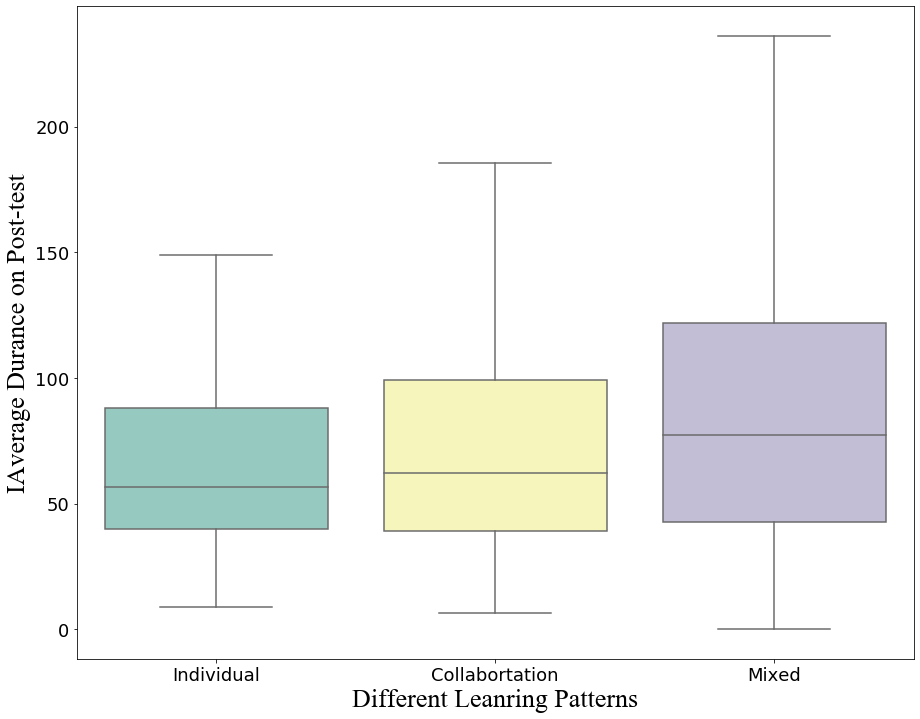

In [82]:
patterns=["Individual"]*len(ind_end)+ ['Collabortation']*len(col_end)+['Mixed']*len(mix_end)
values=np.concatenate((ind_end,col_end,mix_end))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Average Durance on Post-test":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Average Durance on Post-test", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Average Durance on Post-test',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

In [83]:
stats.f_oneway(ind_mod, col_mod,mix_mod)

F_onewayResult(statistic=3.013030235271999, pvalue=0.04991911675826372)

In [84]:
ind_mod=np.array(ind_mod)/5
col_mod=np.array(col_mod)/5
mix_mod=np.array(mix_mod)/5

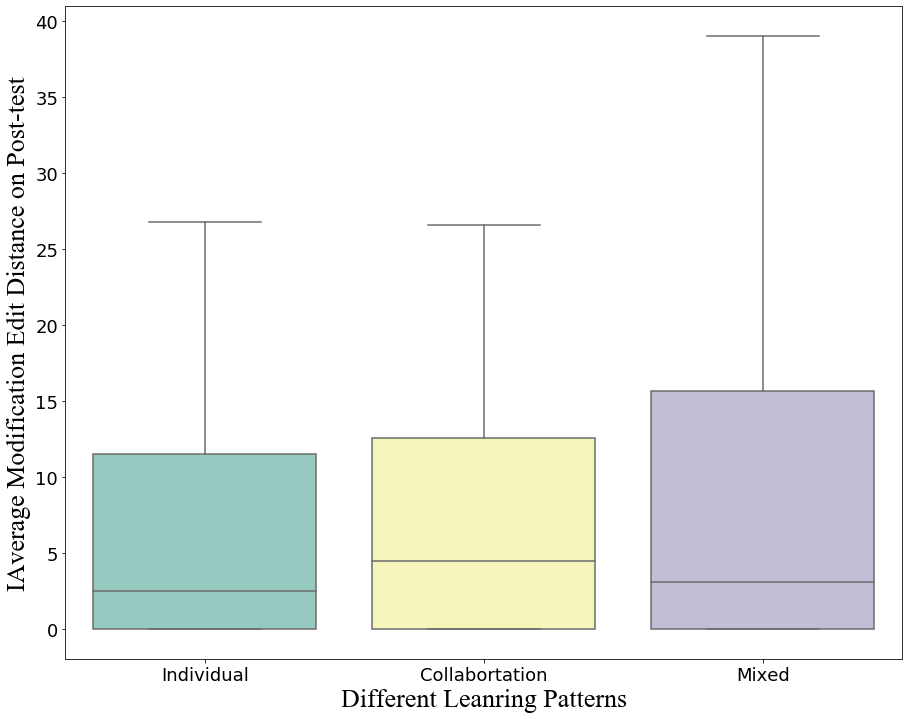

In [85]:
patterns=["Individual"]*len(ind_mod)+ ['Collabortation']*len(col_mod)+['Mixed']*len(mix_mod)
values=np.concatenate((ind_mod,col_mod,mix_mod))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Average Modification Edit Distance on Post-test":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Average Modification Edit Distance on Post-test", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('IAverage Modification Edit Distance on Post-test',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

In [93]:
ind_score=np.array(ind_score)
ind_score=ind_score[ind_score>0]
col_score=np.array(col_score)
col_score=col_score[col_score>0]
mix_score=np.array(mix_score)
mix_score=mix_score[mix_score>0]

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [94]:
stats.f_oneway(ind_score, col_score,mix_score)

F_onewayResult(statistic=4.753051143494143, pvalue=0.00928551072071094)

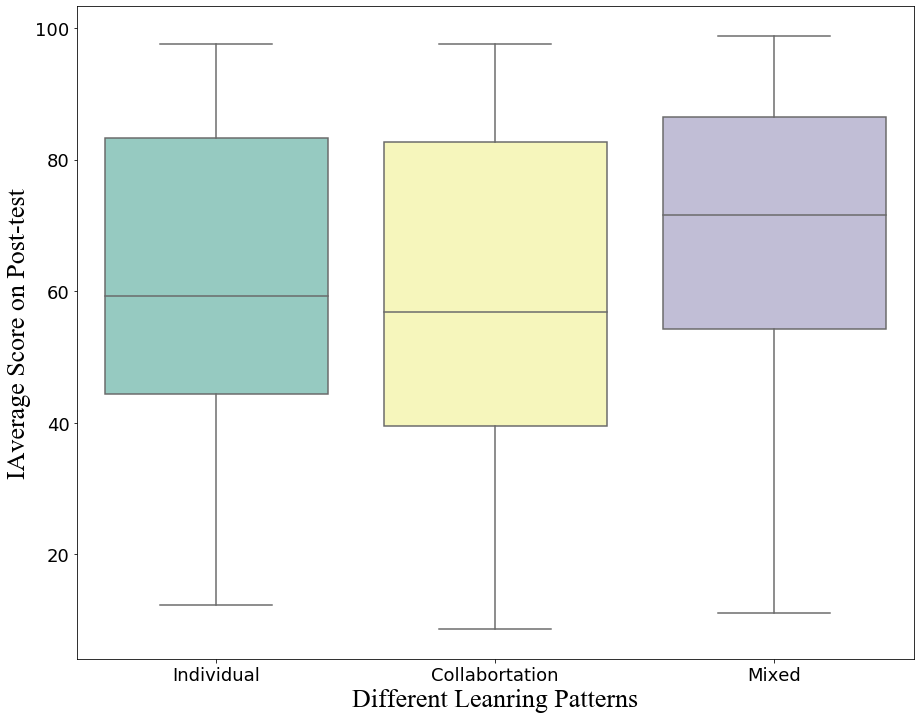

In [87]:
patterns=["Individual"]*len(ind_score)+ ['Collabortation']*len(col_score)+['Mixed']*len(mix_score)
values=np.concatenate((ind_score,col_score,mix_score))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Average Score on Post-test":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Average Score on Post-test", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('IAverage Score on Post-test',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]